In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from unidecode import unidecode

In [36]:
with open("movie_name") as f:
    movies=[line[:-1] for line in f]
movies=list(set(movies))

In [37]:
characters={}
for m in movies:
    for c in m:
        if c in characters:
            characters[c]+=1
        else:
            characters[c]=1

[':', ',', "'", '!', '.', '-', '(', ')', '–', '&', '$', '?', '/', '⁄', '’', '%', '@', '*', '+', '#', '…', ';']


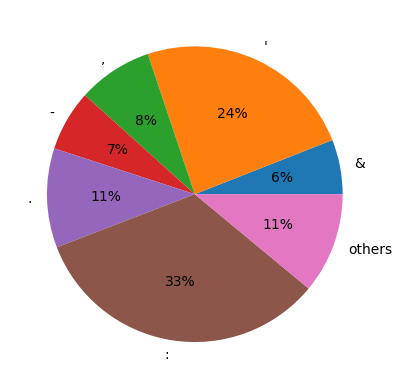

In [38]:
movie_char_df=pd.DataFrame(list(characters.items()),columns=["keys","counts"])
df_view = movie_char_df.copy()
df_view=df_view[df_view["keys"].str.match("[^\w\d ]+")]
print(df_view["keys"].to_list())
df_view.loc[df_view['counts'] < 100, 'keys'] = 'others'
df_view = df_view.groupby('keys')['counts'].sum().reset_index()
df_view["keys"]=df_view["keys"].apply(lambda x:x.replace(" ","<space>"))
fig = plt.pie(df_view["counts"], labels=df_view["keys"], autopct='%.0f%%') 

In [39]:
def convert_roman_numerals(text):
    roman_numerals = {
        'I': 1,
        'V': 5,
        'X': 10,
        'L': 50,
        'C': 100,
        'D': 500,
        'M': 1000,
    }
    def roman_to_int(roman_string):
        n = 0
        prev = 0
        for char in roman_string:
            current = roman_numerals[char]
            if current > prev:
                n -= prev
            n += current
            prev = current
        return str(n)  # Return integer as a string

    def replace_roman_numerals(match):
        roman_numeral = match.group()
        integer = roman_to_int(roman_numeral)
        return integer

    pattern = r'\b(?!LLC)(?=[MDCLXVI]+\b)M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b'
    new_text = re.sub(pattern, replace_roman_numerals, text)
    return new_text

pattern = re.compile(r'\b(?!LLC)(?=[MDCLXVI]+\b)M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b')
converted=[]
for m in movies:
    if pattern.findall(m[1:]):
        converted.append(convert_roman_numerals(m))
movies.extend(converted)
print("Number of movie with Roman number",len(converted))
print("Percentage of movie with Roman number",len(converted)/len(movies)*100,"%")

Number of movie with Roman number 158
Percentage of movie with Roman number 1.5966046887631364 %


In [40]:
pattern=re.compile("[^\w\d]+")
with open("movie_name_filtered","a") as f:
    for i,text in enumerate(movies):
        text=pattern.sub("",text.lower().replace(" ","_").replace("&","and"))
        text=unidecode(text)
        f.write(text)
        f.write("\n")

: 